In [355]:
import numpy as np
import tensorflow as tf
from IPython import display
import sys
%matplotlib inline

In [378]:
x_train = np.asarray(np.arange(-2, 2, 0.005), dtype='f')



In [379]:
print  np.matrix(x_train).shape
#print np.matrix(x_train).T, np.matrix(x_train).T.shape
#print x_train[0:3], np.matrix(x_train[0:3]).T, np.matrix(x_train[0:3]).T.shape

(1, 800)


In [380]:
y_train = np.sin(x_train*1.5 * np.pi)

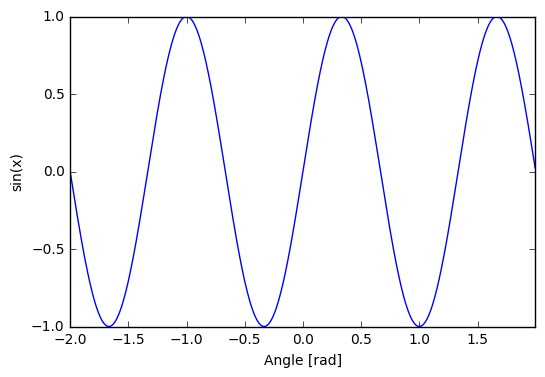

In [381]:
import matplotlib.pylab as plt
plt.plot(x_train, y_train)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [382]:
#Hyperparamters
learning_rate = 0.0005
training_epochs = 25000
batch_size = 100
display_step = 1000
n_samples = 1000

# Network Parameters
n_hidden_1 = 70 # 1st layer number of features
n_hidden_2 = 70 # 2nd layer number of features
n_input = 1 # Number of inputs 
n_output = 1 # NUmber of outputs

# tf Graph input
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32,  [None, 1])


In [383]:
# Create model
def feed_forward(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [384]:

# Store layers weight & biasn_output
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

# Construct model
pred = feed_forward(X, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.pow(pred-Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables10
init = tf.initialize_all_variables()

In [385]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        #i = 0
        #while i < 4:
            #x = x_train[50*i:50*(i+1)]
            #x = np.matrix(x_train[250*i:50*(i+1)]).T
            #y = np.matrix(y_train[50*i:50*(i+1)]).T
            #sess.run(optimizer, feed_dict={X: x , Y: y })
            #i = i + 1
        #for (x, y) in zip(x_train, y_train):
            #x = np.matrix(x)
            #y = np.matrix(y)
            #sess.run(optimizer, feed_dict={X: x , Y: y })
        sess.run(optimizer, feed_dict={X: np.matrix(x_train).transpose() , Y: np.matrix(y_train).transpose() })   
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            x_temp = np.matrix(x_train).transpose()
            y_temp = np.matrix(y_train).transpose()
            c = sess.run(cost, feed_dict={X: np.matrix(x_train).transpose() , Y: np.matrix(y_train).transpose() })
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)

    print "Optimization Finished!"
    #training_cost = sess.run(cost, feed_dict={X: x_train , Y: y_train })
    #print "Training cost=", training_cost
    x_TEST = np.asarray(np.arange(-2.0, 2.5, 0.003), dtype='f')
    x_temp = np.matrix(x_TEST).transpose()
    # Final W and b
    Wopt = sess.run(weights)
    bopt = sess.run(biases)
    fopt = feed_forward(np.matrix(x_temp),Wopt,bopt)
    fopt = sess.run(fopt)
    #print fopt

Epoch: 1000 cost= 0.229208991
Epoch: 2000 cost= 0.037989989
Epoch: 3000 cost= 0.020627832
Epoch: 4000 cost= 0.011506055
Epoch: 5000 cost= 0.006174119
Epoch: 6000 cost= 0.003474271
Epoch: 7000 cost= 0.002160342
Epoch: 8000 cost= 0.001395496
Epoch: 9000 cost= 0.000917483
Epoch: 10000 cost= 0.000611014
Epoch: 11000 cost= 0.000453158
Epoch: 12000 cost= 0.000555789
Epoch: 13000 cost= 0.004768587
Epoch: 14000 cost= 0.000215987
Epoch: 15000 cost= 0.001972346
Epoch: 16000 cost= 0.000173541
Epoch: 17000 cost= 0.000163183
Epoch: 18000 cost= 0.000147213
Epoch: 19000 cost= 0.000139990
Epoch: 20000 cost= 0.000134026
Epoch: 21000 cost= 0.000128360
Epoch: 22000 cost= 0.000125107
Epoch: 23000 cost= 0.000122230
Epoch: 24000 cost= 0.000119003
Epoch: 25000 cost= 0.000116175
Optimization Finished!


In [386]:
fopt = np.squeeze(np.asarray(fopt))


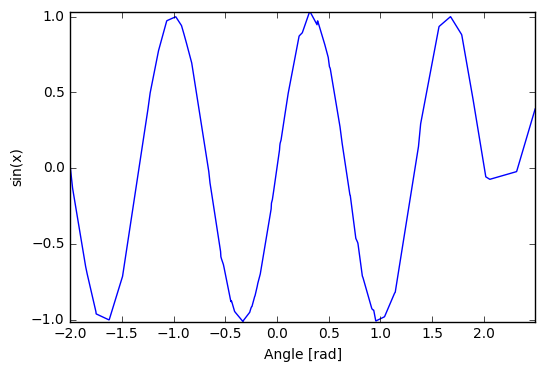

In [387]:
plt.plot(x_TEST, fopt)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()